In [1]:
import numpy as np
import pandas as pd

In [ ]:
def fraud_ratio():
    df = pd.read_csv('assets/fraud_data.csv')
    y = df.iloc[:,-1].value_counts()
    return y[1]/(y[1]+y[0])
fraud_ratio()

0.016410823768035772

In [2]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### SVC
This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [ ]:
def SVC_model():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    
    model=SVC()
    model.fit(X_train, y_train)
    y_p=model.predict(X_test)
    rec=recall_score(y_test, y_p)
    pre=precision_score(y_test, y_p)
    acc=model.score(X_test, y_test)
    
    return (acc, rec, pre)
SVC_model()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Tuning and confussion matrix

This function should return a confusion matrix, a 2x2 numpy array with 4 integers.

In [ ]:
def confussion_matrix():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    thre=-220
    clf=SVC(C= 1e9, gamma= 1e-07)
    clf.fit(X_train,y_train)
    # y_pred = clf.predict(X_test)  # default threshold is 0.5
    y_pred = (clf.decision_function(X_test) > thre).astype(int) # set threshold as 0.3
    #y_pred = clf.decision_function(X_test)
    confusion = confusion_matrix(y_test, y_pred)
    # YOUR CODE HERE
    return confusion
confussion_matrix()

array([[5320,   24],
       [  14,   66]])

### Logistic regression

solver='liblinear'

This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

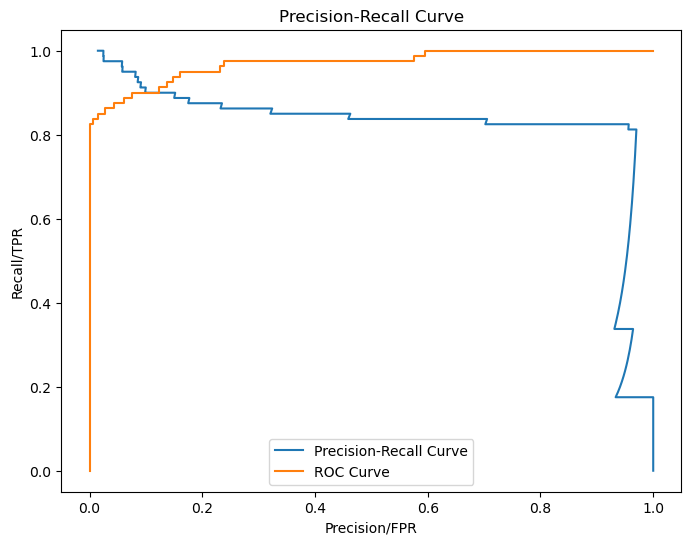

(0.825, 0.95)

In [ ]:
import matplotlib.pyplot as plt
def LR_model():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve
    clf=LogisticRegression(solver='liblinear')
    clf.fit(X_train, y_train)
    y_scores = clf.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    fpr, tpr, thresholds2 = roc_curve(y_test, y_scores)
    r=(recall[precision==0.75].mean(),0.95)
    plt.figure(figsize=(8, 6)) 
    plt.plot(precision, recall, label='Precision-Recall Curve') 
    plt.plot(fpr, tpr, label='ROC Curve') 
    plt.xlabel('Precision/FPR')
    plt.ylabel('Recall/TPR') 
    plt.title('Precision-Recall Curve') 
    plt.legend() 
    plt.show()
    return r
LR_model()


### Grid search tuning


*This function should return a 4 by 2 numpy array with 8 scores.*


In [3]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    
    clf=LogisticRegression(solver='liblinear')
    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10]}
    grid_clf = GridSearchCV(clf, param_grid = grid_values, scoring = 'recall', cv=3)
    g_clf=grid_clf.fit(X_train, y_train)
    
    return g_clf.cv_results_["mean_test_score"].reshape((4,2))
answer_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ]])

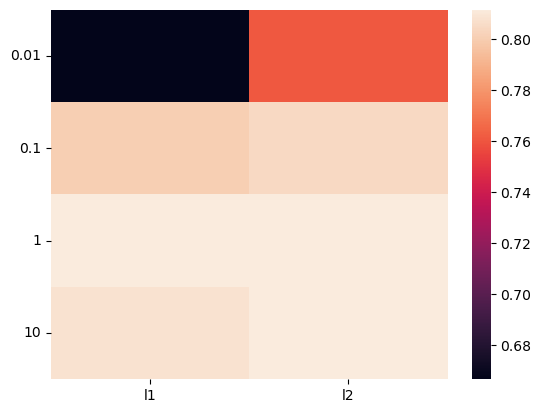

In [5]:
# Use the following function to help visualize results from the grid search
%matplotlib inline
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(4,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())